In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing


import warnings 
warnings.filterwarnings('ignore')

## 1. Smoothing - Simple Moving Average (SMA)


### 1. **Smoothing**
Smoothing is a technique used in time series analysis to reduce the noise or short-term fluctuations in the data and reveal the underlying patterns or trends. The goal is to highlight the long-term direction or structure of the data while ignoring random variations or outliers.

### A. **Moving Average (MA)**

A **Moving Average (MA)** is one of the simplest and most common methods for smoothing time series data. The basic idea behind a moving average is to take a window of data points, compute the average, and then "slide" this window forward through the series to smooth out the variations.

#### Key Concepts:
- **Simple Moving Average (SMA)**: This is the most basic form of moving average. It is calculated by averaging a fixed number of consecutive points in the time series.
  
  For example, with a 5-day moving average:
  - For each point in the series, you compute the average of the previous 5 days.
  - The average moves along the time series as you proceed.

#### Formula:
If you have a time series `y_t`, the moving average for a window size of `k` is calculated as:

```
SMA_t = (1/k) * Σ(y_i), for i = t-k+1 to t
```

Where:
- `y_t` is the value at time `t`.
- `k` is the window size (number of periods).

#### Example:
For a time series of daily temperatures:
- For day 1 to day 5, you average the temperatures from those days.
- Then, for day 2 to day 6, you average the temperatures for days 2 to 6, and so on.

#### Use Cases:
- **Noise Reduction**: Useful when you want to reduce short-term fluctuations (e.g., daily stock prices, sensor data).
- **Trend Detection**: Can be helpful to visualize the overall trend, especially if the data is very noisy.

#### Types of Moving Averages:
- **Simple Moving Average (SMA)**: The basic version, as described above.
- **Weighted Moving Average (WMA)**: In this version, different data points within the window are given different weights, with more recent data typically being weighted more heavily.
- **Exponential Moving Average (EMA)**: A variation of WMA where the weight decreases exponentially as you move back in time.

---

### B. **Exponential Smoothing**

Exponential Smoothing is a more advanced method of smoothing where each data point is given a weight that decreases exponentially as you move further back in time. This method is particularly useful when forecasting because it allows more recent observations to have a larger influence on the forecast.

#### Key Concepts:
- **Exponential Smoothing** assigns exponentially decreasing weights to past observations. The most recent observation receives the highest weight, and the weight decreases as you go back in time.
- It’s a weighted average where the weighting factor is controlled by a parameter known as **alpha (α)**. The closer α is to 1, the more weight is given to the most recent observation.

There are three main types of exponential smoothing:
1. **Simple Exponential Smoothing (SES)**  
2. **Holt’s Linear Trend Method**  
3. **Holt-Winters (Triple Exponential Smoothing)**  

---

### 1. **Simple Exponential Smoothing (SES)**

Simple Exponential Smoothing is the most basic form of exponential smoothing, and it’s best suited for data that does **not** have a trend or seasonality (i.e., stationary data).

#### Key Idea:
- SES applies exponentially decreasing weights to past observations, with more recent data points receiving higher weights.
- The forecast at time \( t+1 \) is a weighted sum of the actual data up until time \( t \), where the weights decrease exponentially.

#### Formula:
The forecast for time `t+1` is:

```
ŷ_{t+1} = α y_t + (1 - α) ŷ_t
```

Where:

- `y_t` is the actual value at time `t`,
- `ŷ_t` is the forecasted value for time `t`,
- `α` is the smoothing constant (0 < α ≤ 1).

#### Use Cases:
- **Stationary Data**: SES is best for time series data that doesn't exhibit a trend or seasonality.
- **Short-Term Forecasting**: Since it assigns more weight to the most recent data, SES is effective for short-term predictions when there’s little change over time.

---

### 2. **Holt’s Linear Trend Method**

Holt’s Linear Trend Method extends Simple Exponential Smoothing by adding a component to capture **trends** in the data. This method is useful when the data has a linear trend (i.e., an increasing or decreasing pattern).

#### Key Idea:
- In addition to the level (like in SES), Holt’s method also includes a trend component that models the linear trend in the data.
- The forecast is a weighted sum of the level and the trend at time \( t \).

#### Formula:
The forecast equations for Holt’s method are:
- **Level**: `L̂_t = α y_t + (1 - α)(L̂_{t-1} + T̂_{t-1})`
- **Trend**: `T̂_t = β (L̂_t - L̂_{t-1}) + (1 - β)T̂_{t-1}`
- **Forecast**: `ŷ_{t+h} = L̂_t + h T̂_t`

Where:
- `L̂_t` is the level of the series at time `t`,
- `T̂_t` is the trend at time `t`,
- `α` and `β` are the smoothing parameters for the level and the trend, respectively.

#### Use Cases:
- **Linear Trend Data**: Use Holt’s method when the data shows a consistent upward or downward trend.
- **Medium-Term Forecasting**: It's effective when you expect the trend to continue for some time.

---

### 3. **Holt-Winters (Triple Exponential Smoothing)**

Holt-Winters is an extension of Holt’s Linear Trend method that also includes a component to capture **seasonality** in the data. It’s used when the time series exhibits both trend and seasonality, making it one of the most popular forecasting methods.

#### Key Idea:
- Holt-Winters adds a **seasonal component** to the model, making it useful for series that exhibit periodic fluctuations (e.g., yearly sales data, monthly temperatures).
- There are two variations: **additive** and **multiplicative** seasonal components. The additive version is used when the seasonal variation is constant, and the multiplicative version is used when the seasonal variation grows or shrinks over time.

#### Formula (Additive Model):
- **Level**: `L̂_t = α (y_t - s_{t-m}) + (1 - α)(L̂_{t-1} + T̂_{t-1})`
- **Trend**: `T̂_t = β (L̂_t - L̂_{t-1}) + (1 - β)T̂_{t-1}`
- **Seasonality**: `s_t = γ (y_t - L̂_t) + (1 - γ) s_{t-m}`
- **Forecast**: `ŷ_{t+h} = L̂_t + h T̂_t + s_{t+h-m}`
  
Where:
- \( s_{t-m} \) is the seasonal component from time \( t-m \), where \( m \) is the season length (e.g., 12 months for yearly seasonality).

#### Use Cases:
- **Seasonal Data**: Holt-Winters is the method of choice when data exhibits clear seasonal patterns (e.g., sales increasing around holidays, temperature varying by season).
- **Long-Term Forecasting**: It’s particularly useful for long-term forecasting where trends and seasonality need to be accounted for.

---

### Summary of When to Use Each Method:
- **Simple Moving Average**: Use when you just need to smooth out short-term fluctuations and your data doesn’t have a strong trend or seasonality.
- **Simple Exponential Smoothing (SES)**: Use for stationary data where there’s no trend or seasonality.
- **Holt’s Linear Trend**: Use when your data shows a linear trend but no seasonality.
- **Holt-Winters (Triple Exponential Smoothing)**: Use when your data exhibits both trend and seasonality, especially for periodic or cyclical data.
 

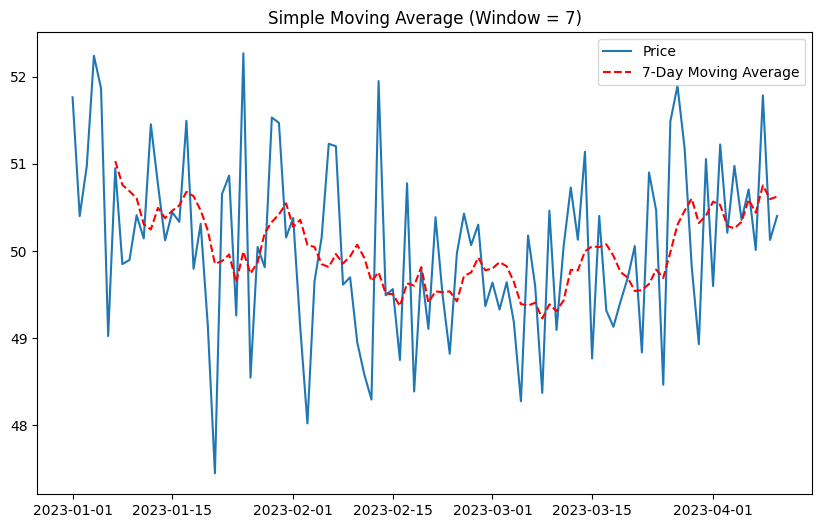

In [18]:
# Sample data: Create a time series data (e.g., daily stock prices)
np.random.seed(0)
data = np.random.randn(100) + 50  # Random walk around 50
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')

# Create a DataFrame
df = pd.DataFrame(data, columns=['Price'], index=dates)

# Simple Moving Average (SMA) with a window size of 7 (7-day moving average)
window_size = 7
df['SMA'] = df['Price'].rolling(window=window_size).mean()

# Plot the data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(df['Price'], label='Price')
plt.plot(df['SMA'], label=f'{window_size}-Day Moving Average', color='red', linestyle='--')
plt.title(f'Simple Moving Average (Window = {window_size})')
plt.legend()
plt.show()


---
---
---

## 2. ARIMA (AutoRegressive Integrated Moving Average)


### 1. **ARIMA Overview**

ARIMA stands for **AutoRegressive Integrated Moving Average**. It's a class of models that is widely used for forecasting time series data, especially when the data exhibits **trends** but does **not necessarily have seasonality**. 

An ARIMA model is specified as:

$$
\text{ARIMA}(p, d, q)
$$

Where:
- **p**: The number of lag observations included in the **autoregressive** model.
- **d**: The number of times the series is differenced to make it **stationary**.
- **q**: The size of the moving average window, or the number of lagged forecast errors in the **moving average** model.

### Key Components of ARIMA:

#### 1. **AR (AutoRegressive)**: 
This part of the model captures the relationship between an observation and a number of **lagged observations** (previous values). In simple terms, it's based on the assumption that past values (lags) have an influence on the current value.

- **AR(p)** means the model uses the **past p values** (lags) to predict the current value. For example, AR(1) means the current value depends on the previous value, AR(2) means it depends on the last two values, and so on.

#### 2. **I (Integrated)**:
This represents **differencing**, which is the process of subtracting previous values from the current value to remove any trends and make the time series **stationary**.

- Stationarity means that the statistical properties (mean, variance, and autocorrelation) of the time series do not change over time.
- If the time series is not stationary, we use **differencing** to make it stationary. For example, if the data has a linear trend, we might take the difference between consecutive values to remove the trend (this is the first difference).
- The number of times the differencing is done is represented by **d**.

#### 3. **MA (Moving Average)**:
The moving average component models the relationship between an observation and the residual errors from a moving average model applied to lagged observations.

- **MA(q)** means the model uses the **past q forecast errors** to predict the current value. For example, if q = 1, the model looks at the error of the previous forecast and adjusts the prediction accordingly.

---

### ARIMA Model Parameters

- **p** (AutoRegressive): Number of lagged values (previous observations) included in the model.
- **d** (Integrated): Number of times the data needs to be differenced to make it stationary.
- **q** (Moving Average): Number of past forecast errors used in the model.


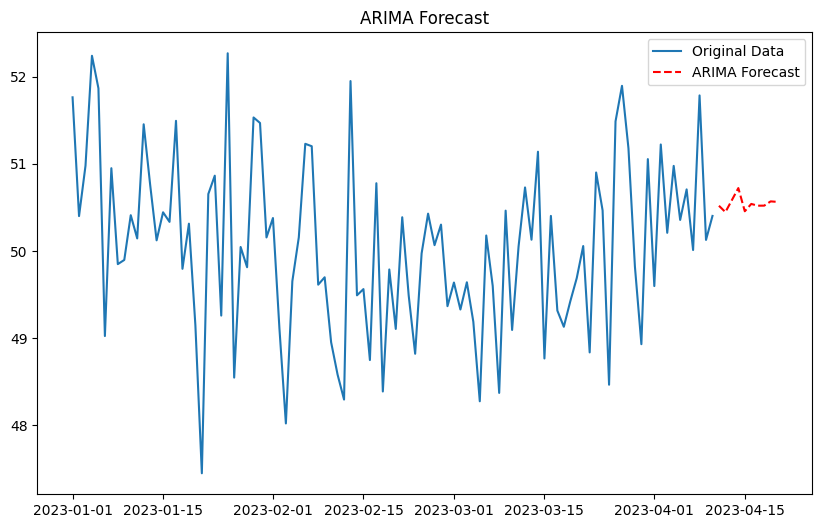

Forecasted values: 2023-04-11    50.518847
2023-04-12    50.446013
2023-04-13    50.583640
2023-04-14    50.721784
2023-04-15    50.455677
2023-04-16    50.539796
2023-04-17    50.519585
2023-04-18    50.520248
2023-04-19    50.569141
2023-04-20    50.563574
Freq: D, Name: predicted_mean, dtype: float64


In [19]:


# Sample data: Create a time series data (e.g., daily stock prices)
np.random.seed(0)
data = np.random.randn(100) + 50  # Random walk around 50
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')

# Create a DataFrame
df = pd.DataFrame(data, columns=['Price'], index=dates)

# Fit an ARIMA model (p=5, d=1, q=0)
model = ARIMA(df['Price'], order=(5, 1, 0))
model_fit = model.fit()

# Get the forecast for the next 10 periods
forecast = model_fit.forecast(steps=10)

# Plot the original series and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Price'], label='Original Data')
plt.plot(pd.date_range(start=df.index[-1], periods=11, freq='D')[1:], forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# Display the forecast values
print(f"Forecasted values: {forecast}")


- **ARIMA Model**: The `ARIMA()` function from `statsmodels` is used to fit the ARIMA model. It takes parameters `order=(p, d, q)`:
  - **p** is the autoregressive (AR) term.
  - **d** is the differencing (I) term to make the series stationary.
  - **q** is the moving average (MA) term.
- After fitting the model, the `forecast()` function is used to predict future values.

---
---
---

## 3. Exponential Smoothing (Simple Exponential Smoothing, Holt’s Linear, Holt-Winters)


### 1. **Single Exponential Smoothing (SES)**

#### Overview:
Single Exponential Smoothing (SES) is the simplest form of exponential smoothing. It is used when your data **does not exhibit a trend** or **seasonality**, meaning it’s best suited for stationary time series data (data where the statistical properties like mean and variance do not change over time). SES relies on **weighted averages**, with more recent observations getting more weight, but **no trend or seasonal adjustments**.

#### How it Works:
- In SES, the forecast is calculated using a **weighted average** of past observations.
- The weights for past observations decrease **exponentially**, meaning that more recent observations have a greater influence on the forecast.
- The key parameter in SES is **α (alpha)**, which is a smoothing constant that controls how much weight is placed on the most recent observation.

#### Formula:
The forecast for the next period \( \hat{y}_{t+1} \) is calculated as:
\[
\hat{y}_{t+1} = \alpha y_t + (1 - \alpha) \hat{y}_t
\]
Where:
- \( y_t \) is the actual value at time \( t \),
- \( \hat{y}_t \) is the forecasted value at time \( t \),
- \( \alpha \) is the smoothing parameter, with values between 0 and 1.

#### Example:
If you have a time series of monthly sales numbers (which fluctuate randomly without any clear trend or seasonality), SES can smooth the data by giving more weight to the most recent months’ sales, and use that to forecast future sales.

#### Use Cases:
- **Stationary Data**: SES is ideal for data without any clear upward or downward trend and no seasonal variation.
- **Short-term Forecasting**: When the future depends mostly on the most recent observation.

#### Advantages:
- Simple and computationally efficient.
- Good for datasets where recent data is more relevant than older data.

#### Disadvantages:
- Cannot capture trends or seasonality.
- Limited accuracy if there’s a significant trend or seasonal pattern in the data.

---

### 2. **Holt’s Linear Trend Method**

#### Overview:
Holt’s Linear Trend Method extends **SES** to account for **trends** in the data. If your time series exhibits a linear trend (i.e., the data shows consistent upward or downward movement over time), Holt’s method is more suitable than SES. It adds an additional component to capture the **slope** or **direction** of the trend.

#### How it Works:
- Holt’s method models **two components** of the data:
  1. **Level**: The baseline or starting point of the data at any given time.
  2. **Trend**: The rate of change or slope (whether the data is increasing or decreasing).

- Holt’s method uses two smoothing parameters, **α (alpha)** for the level and **β (beta)** for the trend. These parameters determine the smoothing of both the level and the trend.

#### Formula:
1. **Level Equation**: 
\[
\hat{L}_t = \alpha (y_t) + (1 - \alpha)(\hat{L}_{t-1} + \hat{T}_{t-1})
\]
2. **Trend Equation**:
\[
\hat{T}_t = \beta (\hat{L}_t - \hat{L}_{t-1}) + (1 - \beta) \hat{T}_{t-1}
\]
3. **Forecast Equation**:
\[
\hat{y}_{t+h} = \hat{L}_t + h \hat{T}_t
\]
Where:
- \( \hat{L}_t \) is the level (the smoothed value of the series),
- \( \hat{T}_t \) is the trend (the rate of change),
- \( \alpha \) and \( \beta \) are smoothing parameters for level and trend,
- \( h \) is the forecast horizon (number of periods ahead).

#### Example:
If you have sales data that shows consistent growth over time (e.g., a product that’s gaining popularity), Holt’s method will capture both the level of sales and the **slope** or **trend** (whether it’s accelerating or decelerating).

#### Use Cases:
- **Data with Trend**: Holt’s method works well when data exhibits a linear trend (either upward or downward) but no seasonality.
- **Medium-term Forecasting**: When the data has a linear pattern and you want to forecast over several periods into the future.

#### Advantages:
- Can capture and model linear trends.
- More flexibility than SES, as it can account for growth or decline.

#### Disadvantages:
- Does not capture **seasonality**.
- May not perform well if the data has non-linear trends.

---

### 3. **Holt-Winters Seasonal Method**

#### Overview:
The **Holt-Winters Seasonal Method** (also known as **Triple Exponential Smoothing**) is an extension of Holt’s method. It accounts for both **trend** and **seasonality** in the data. Seasonality refers to patterns that repeat at regular intervals (e.g., monthly, yearly), and this method adjusts for those seasonal fluctuations in addition to trends.

The Holt-Winters method is most often used for **data with both trend and seasonality**. It is widely used in applications like sales forecasting, temperature predictions, and financial data where regular fluctuations occur over fixed periods (e.g., daily, monthly, or yearly).

#### How it Works:
- Like Holt’s method, Holt-Winters also includes components for **level** and **trend**.
- The key difference is the **seasonality component**. The seasonal variation is modeled separately and added to the forecast.
- There are two variants of the Holt-Winters method: **additive** and **multiplicative**, which are selected based on the nature of the seasonality:
  - **Additive**: Used when the seasonal fluctuations are roughly constant over time (e.g., monthly sales variation of 100 units).
  - **Multiplicative**: Used when the seasonal fluctuations grow or shrink in proportion to the level of the data (e.g., sales double during the holiday season).

#### Formula (Additive Model):
1. **Level**:
\[
\hat{L}_t = \alpha (y_t - s_{t-m}) + (1 - \alpha)(\hat{L}_{t-1} + \hat{T}_{t-1})
\]
2. **Trend**:
\[
\hat{T}_t = \beta (\hat{L}_t - \hat{L}_{t-1}) + (1 - \beta)\hat{T}_{t-1}
\]
3. **Seasonality**:
\[
s_t = \gamma (y_t - \hat{L}_t) + (1 - \gamma) s_{t-m}
\]
4. **Forecast**:
\[
\hat{y}_{t+h} = \hat{L}_t + h \hat{T}_t + s_{t+h-m}
\]
Where:
- \( \hat{L}_t \) is the level,
- \( \hat{T}_t \) is the trend,
- \( s_t \) is the seasonal component,
- \( \alpha, \beta, \gamma \) are the smoothing parameters for level, trend, and seasonality, respectively,
- \( m \) is the period of the season (e.g., 12 for monthly data with yearly seasonality),
- \( h \) is the forecast horizon.

#### Example:
For a company selling seasonal products (e.g., Christmas decorations), the sales will increase in November and December and decline after the holidays. Holt-Winters can model the **seasonal peaks** in addition to any **underlying trends** (e.g., increasing sales over multiple years).

#### Use Cases:
- **Data with Trend and Seasonality**: Holt-Winters is ideal when your data exhibits both long-term trends (growth or decline) and periodic seasonal variations.
- **Long-term Forecasting**: Useful for predicting future values when both trend and seasonality are present.

#### Advantages:
- Can model both **trend** and **seasonality**.
- Useful for long-term forecasts in cases of periodic data (e.g., monthly sales, quarterly earnings).

#### Disadvantages:
- More complex than SES or Holt’s method.
- The multiplicative model assumes seasonal fluctuations grow proportionally with the data, which may not be suitable for all types of data.

---

### Summary of When to Use Each Method:

1. **Single Exponential Smoothing (SES)**:
   - Best for **stationary data** without trend or seasonality.
   - Simple and computationally efficient.

2. **Holt’s Linear Method**:
   - Best for data with a **linear trend** but no seasonality.
   - Suitable for **medium-term forecasts** where the data is steadily increasing or decreasing.

3. **Holt-Winters Seasonal Method**:
   - Best for data with **both trend and seasonality**.
   - Suitable for forecasting **long-term** trends with **repeating seasonal patterns** (e.g., yearly cycles, monthly fluctuations).


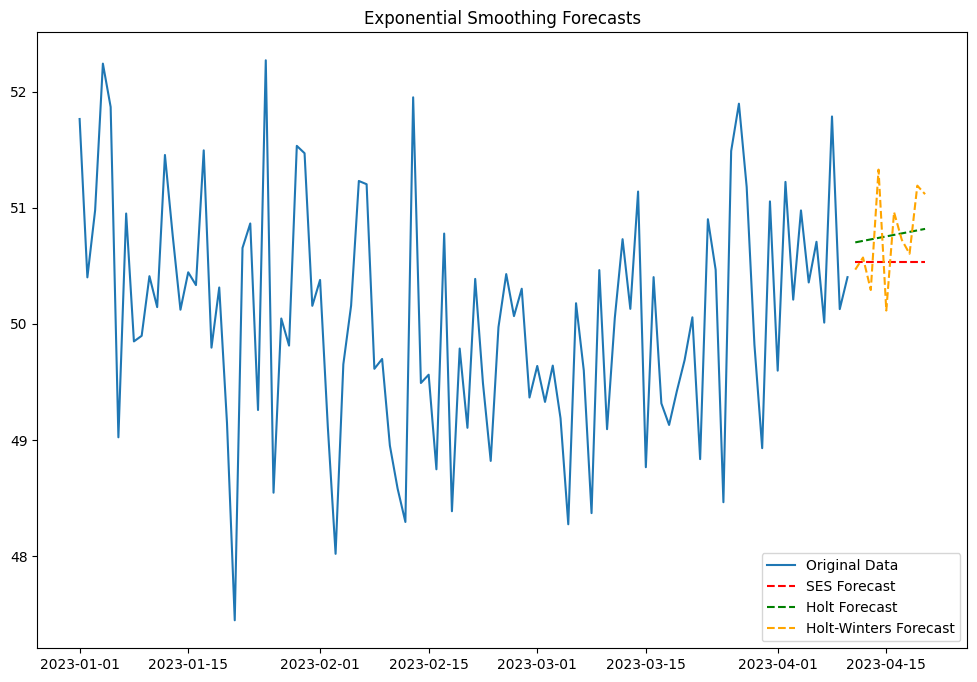

SES Forecast: 2023-04-11    50.533825
2023-04-12    50.533825
2023-04-13    50.533825
2023-04-14    50.533825
2023-04-15    50.533825
2023-04-16    50.533825
2023-04-17    50.533825
2023-04-18    50.533825
2023-04-19    50.533825
2023-04-20    50.533825
Freq: D, dtype: float64
Holt Forecast: 2023-04-11    50.701452
2023-04-12    50.714361
2023-04-13    50.727271
2023-04-14    50.740181
2023-04-15    50.753090
2023-04-16    50.766000
2023-04-17    50.778910
2023-04-18    50.791819
2023-04-19    50.804729
2023-04-20    50.817639
Freq: D, dtype: float64
Holt-Winters Forecast: 2023-04-11    50.466842
2023-04-12    50.570997
2023-04-13    50.291393
2023-04-14    51.328238
2023-04-15    50.114665
2023-04-16    50.961459
2023-04-17    50.723395
2023-04-18    50.603585
2023-04-19    51.190055
2023-04-20    51.116508
Freq: D, dtype: float64


In [21]:
# Sample data: Create a time series data (e.g., daily stock prices)
np.random.seed(0)
data = np.random.randn(100) + 50  # Random walk around 50
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')

# Create a DataFrame
df = pd.DataFrame(data, columns=['Price'], index=dates)

# **Simple Exponential Smoothing**
# Using Exponential Smoothing for forecasting (alpha = 0.2)
model_ses = ExponentialSmoothing(df['Price'], trend=None, seasonal=None, initialization_method="estimated")
fit_ses = model_ses.fit(smoothing_level=0.2)

# **Holt’s Linear Trend Method (Additive)**
# Adding trend component (trend='add')
model_holt = ExponentialSmoothing(df['Price'], trend='add', seasonal=None, initialization_method="estimated")
fit_holt = model_holt.fit(smoothing_level=0.2, smoothing_trend=0.2)

# **Holt-Winters Method (Additive)**
# Adding trend and seasonality (seasonal='add', seasonal_periods=12 for monthly data)
model_hw = ExponentialSmoothing(df['Price'], trend='add', seasonal='add', seasonal_periods=12, initialization_method="estimated")
fit_hw = model_hw.fit(smoothing_level=0.2, smoothing_trend=0.2, smoothing_seasonal=0.2)

# Forecasting the next 10 periods
forecast_ses = fit_ses.forecast(steps=10)
forecast_holt = fit_holt.forecast(steps=10)
forecast_hw = fit_hw.forecast(steps=10)

# Plotting the data and the forecasts
plt.figure(figsize=(12, 8))
plt.plot(df['Price'], label='Original Data')
plt.plot(pd.date_range(start=df.index[-1], periods=11, freq='D')[1:], forecast_ses, label='SES Forecast', color='red', linestyle='--')
plt.plot(pd.date_range(start=df.index[-1], periods=11, freq='D')[1:], forecast_holt, label='Holt Forecast', color='green', linestyle='--')
plt.plot(pd.date_range(start=df.index[-1], periods=11, freq='D')[1:], forecast_hw, label='Holt-Winters Forecast', color='orange', linestyle='--')

plt.title('Exponential Smoothing Forecasts')
plt.legend()
plt.show()

# Display the forecasted values for each method
print(f"SES Forecast: {forecast_ses}")
print(f"Holt Forecast: {forecast_holt}")
print(f"Holt-Winters Forecast: {forecast_hw}")

- **Simple Exponential Smoothing**: This method uses the `ExponentialSmoothing()` function from `statsmodels`. We specify `trend=None` and `seasonal=None` for SES, and use the `smoothing_level` parameter to set the smoothing constant α.
- **Holt’s Linear Trend Method**: By setting `trend='add'` and `seasonal=None`, we model the trend but not seasonality.
- **Holt-Winters Method**: For seasonal data, we set `trend='add'`, `seasonal='add'`, and specify `seasonal_periods=12` for yearly seasonality (you can adjust the number based on your data’s seasonality).

